<a href="https://colab.research.google.com/github/minson18/AI-Capstone-Program1/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
# Root Path
os.chdir('/content/drive/MyDrive/AI總整/prog1')

TRAIN_PATH = "Customers.csv"

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import math
import csv
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import random
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [ ]:
# Data Processing
data_df = pd.read_csv(TRAIN_PATH)
# Replace striing as int
data_df['Gender'] = data_df['Gender'].replace(['Female', 'Male'], [0, 1])
data_df['Profession'] = data_df['Profession'].replace(
            data_df["Profession"].unique(), list(range(data_df["Profession"].unique().size)))

# Define Predicted Target
data_df.insert(len(data_df.columns), 'High Spending', 0)
data_df.loc[data_df['Spending Score (1-100)']>50, 'High Spending'] = 1

# Drop Unneedee Columns
data_df.drop(['Spending Score (1-100)', 'CustomerID'], axis = 1, inplace = True)

data = data_df.to_numpy()
X = data[:, :-1]
Y = data[:, -1]

In [ ]:
from functools import reduce
def report_average(reports):
    mean_dict = dict()
    for label in reports[0].keys():
        dictionary = dict()

        if label in 'accuracy':
            mean_dict[label] = sum(d[label] for d in reports) / len(reports)
            continue

        for key in reports[0][label].keys():
            dictionary[key] = sum(d[label][key] for d in reports) / len(reports)
        mean_dict[label] = dictionary

    return mean_dict

In [ ]:
# Cross Validation Process
# clf:Classifier, X, Y, K:folds of KFold
def Cross_Val(clf, X, Y, k):
  kf = KFold(n_splits=k, shuffle=True)
  CMs = [] # all Confusion Matrices
  reports = [] # all Classification Reports

  for train_index, val_index in kf.split(X):
    x_train = X[train_index]
    y_train = Y[train_index]
    x_val = X[val_index]
    y_val = Y[val_index]

    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_val)
    CM = confusion_matrix(y_val, y_pred)
    report = classification_report(y_val, y_pred, digits=4, output_dict=True)
    CMs.append(CM)
    reports.append(report)

  avg_report = report_average(reports)
  print(pd.DataFrame(avg_report).T)
  total_CM = sum(CMs)
  disp = ConfusionMatrixDisplay(confusion_matrix=total_CM, display_labels=np.array([0, 1]))
  disp.plot()
  plt.show()

  return total_CM, avg_report 

              precision    recall  f1-score  support
0              0.497620  0.494243  0.476729  201.400
1              0.495491  0.500654  0.478093  198.600
accuracy       0.489000  0.489000  0.489000    0.489
macro avg      0.496555  0.497448  0.477411  400.000
weighted avg   0.498240  0.489000  0.473860  400.000


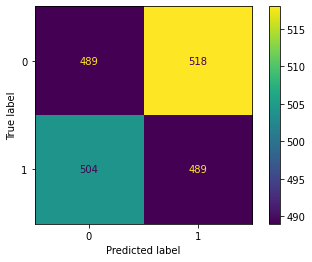

In [ ]:
# Adaboost Experiment
CMs, reports = Cross_Val(AdaBoostClassifier(n_estimators=100, learning_rate=0.01, random_state=0), X, Y, 5)

              precision    recall  f1-score  support
0              0.492343  0.552896  0.514432     40.2
1              0.465997  0.415145  0.427827     39.8
accuracy       0.500000  0.500000  0.500000      0.5
macro avg      0.479170  0.484021  0.471130     80.0
weighted avg   0.484115  0.500000  0.481884     80.0


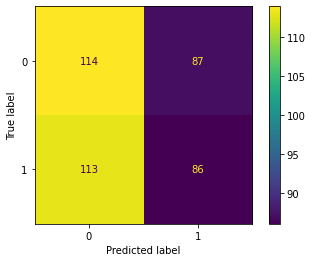

In [ ]:
# Define Different Size of Dataset
X_train, _, y_train, _ = train_test_split(X, Y, train_size=0.2, random_state=0)

# Adaboost Experiment
CMs, reports = Cross_Val(DecisionTreeClassifier(max_depth=2, random_state=0), X_train, y_train, 5)

              precision    recall  f1-score  support
0              0.494786  0.523863  0.506140  201.400
1              0.492384  0.463693  0.474324  198.600
accuracy       0.495000  0.495000  0.495000    0.495
macro avg      0.493585  0.493778  0.490232  400.000
weighted avg   0.494612  0.495000  0.491353  400.000


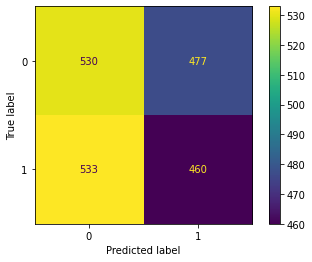

In [ ]:
CMs, reports = Cross_Val(XGBClassifier(learning_rate=0.001), X, Y, 5)

              precision    recall  f1-score   support
0              0.483149  0.442570  0.459169  201.4000
1              0.477604  0.518687  0.494869  198.6000
accuracy       0.479500  0.479500  0.479500    0.4795
macro avg      0.480377  0.480628  0.477019  400.0000
weighted avg   0.480536  0.479500  0.476528  400.0000


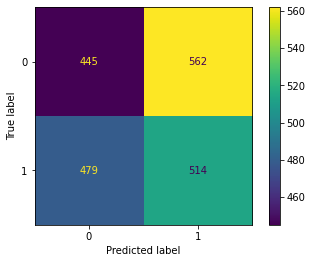

In [ ]:
clf = make_pipeline(StandardScaler(), SVC(gamma='scale'))
CMs, reports = Cross_Val(clf, X, Y, 5)

              precision    recall  f1-score   support
0              0.504475  0.647934  0.553218  201.4000
1              0.487614  0.346392  0.378973  198.6000
accuracy       0.493500  0.493500  0.493500    0.4935
macro avg      0.496044  0.497163  0.466096  400.0000
weighted avg   0.496521  0.493500  0.464361  400.0000


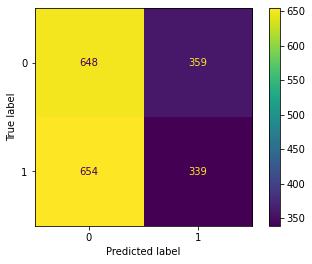

In [ ]:
CMs, reports = Cross_Val(RandomForestClassifier(max_depth=1, random_state=0), X, Y, 5)